Import Libraray

In [11]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib
!pip list
import cv2
import tensorflow as tf
import os
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi   

In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Found 842 files belonging to 2 classes.


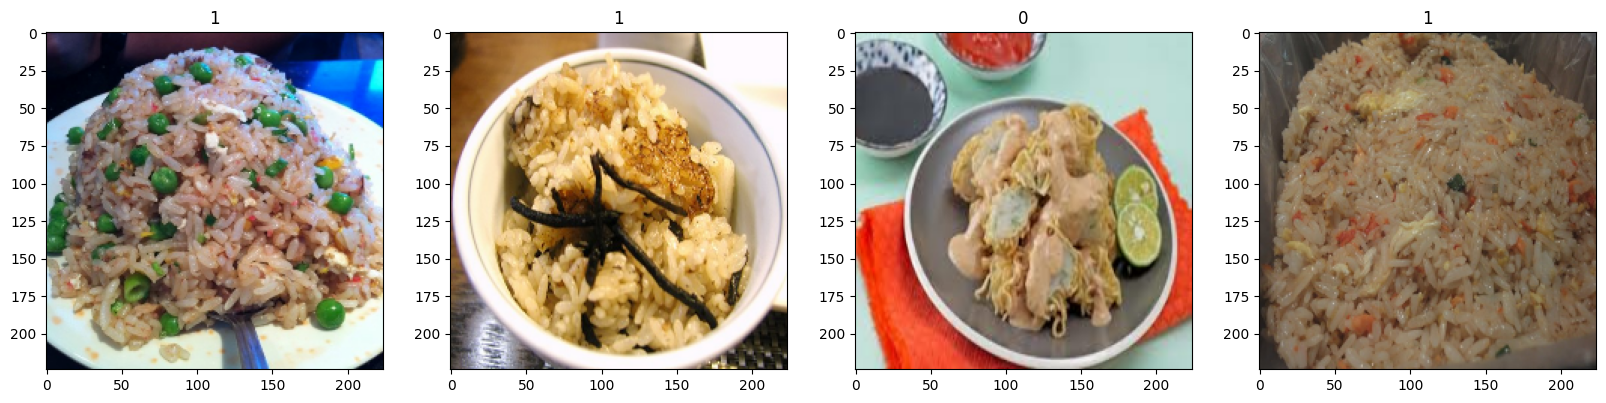

In [13]:
data = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/Rafisa Arif Irfan/Hasil Tes/2/data',image_size = (224,224))

data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

train_size = int(len(data)*.9)
test_size = int(len(data)*.1)

train = data.take(train_size)
test = data.skip(train_size).take(test_size)

In [25]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())
# model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
# model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 batch_normalization_26 (Ba  (None, 111, 111, 32)      128       
 tchNormalization)                                               
                                                                 
 conv2d_43 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                      

In [26]:
model_predict  = model.fit(train, epochs=5)

model_predict.history

Epoch 1/5
24/24 [==============================] - 76s 3s/step - loss: 1.1942 - accuracy: 0.6094
Epoch 2/5
24/24 [==============================] - 74s 3s/step - loss: 0.5045 - accuracy: 0.6992
Epoch 3/5
24/24 [==============================] - 74s 3s/step - loss: 0.4581 - accuracy: 0.7617
Epoch 4/5
24/24 [==============================] - 74s 3s/step - loss: 0.2988 - accuracy: 0.8737
Epoch 5/5
24/24 [==============================] - 76s 3s/step - loss: 0.1826 - accuracy: 0.9297


{'loss': [1.1941696405410767,
  0.5045434236526489,
  0.45812568068504333,
  0.298785001039505,
  0.18261058628559113],
 'accuracy': [0.609375, 0.69921875, 0.76171875, 0.8736979365348816, 0.9296875]}

In [29]:
model.evaluate(test)

2/2 [==============================] - 5s 763ms/step - loss: 0.3952 - accuracy: 0.9844


[0.39519619941711426, 0.984375]

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/Rafisa Arif Irfan/Hasil Tes/2/data/batagor/a (7).jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img, (224,224))
np.expand_dims(resize,0)
test_prediction = model.predict(np.expand_dims(resize/255, 0))
test_prediction
if test_prediction > 0.5:
    print(f'Bukan Batagor')
else:
    print(f'Batagor')

In [31]:
from google.colab import files
model.save("CNN" + ".h5")
files.download('CNN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>